In [77]:
import time
import math
import multiprocessing
from multiprocessing import Pool

def my_func(x):
    s = math.sqrt(x)
    return s

def my_func_verbose(x):
    s = math.sqrt(x)
    print("Task", multiprocessing.current_process(), x, s)
    return s

# A function for timing a job that uses a pool of processes.
#  f is a function that takes a single argument
#  data is an array of arguments on which f will be mapped
#  pool_size is the number of processes in the pool. 
def pool_process(f, data, pool_size):
    with multiprocessing.get_context('fork').Pool(processes=pool_size) as pool:
        print(data, pool_size)
        tp1 = time.time()
        result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
        pool.close() # No more processes
        pool.join()  # Wait for the pool processing to complete. 
        print("Results", result)
        totalt = (time.time()-tp1)
        print("Overall Time:", int(totalt))
        return result, totalt


def check_prime(num):
    t1 = time.time()
    res = False
    if num > 0:
        # check for factors
        for i in range(2,num):
            if (num % i) == 0:
                print(num,"is not a prime number")
                print(i,"times",num//i,"is",num)
                print("Time:", int(time.time()-t1))
                t = (time.time()-t1)    # elapsed time saved to variable
                break
        else:
            print(num,"is a prime number")
            print("Time:", time.time()-t1) 
            t = (time.time()-t1)        # elapsed time saved to variable
            res = True
            # if input number is less than
            # or equal to 1, it is not prime
    return [res, t]


In [2]:
dataRange = [15488801] * 20

In [3]:
pool_process(check_prime, dataRange, 2)

[15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801, 15488801] 2
15488801 is a prime number
Time: 2.401711940765381
15488801 is a prime number
Time: 2.4462931156158447
15488801 is a prime number
Time: 2.08656907081604
15488801 is a prime number
Time: 2.139240026473999
15488801 is a prime number
Time: 2.32076096534729
15488801 is a prime number
Time: 2.3586838245391846
15488801 is a prime number
Time: 2.2380919456481934
15488801 is a prime number
Time: 2.330611228942871
15488801 is a prime number
Time: 2.1654410362243652
15488801 is a prime number
Time: 2.1880462169647217
15488801 is a prime number
Time: 2.8582510948181152
15488801 is a prime number
Time: 2.936882972717285
15488801 is a prime number
Time: 2.354809045791626
15488801 is a prime number
Time: 2.3577170372009277
15488801 is a prime number
Time: 2.2505369186401367
15488801 is a prime number

([[True, 2.463679075241089],
  [True, 2.165889024734497],
  [True, 2.382924795150757],
  [True, 2.417957067489624],
  [True, 2.1429970264434814],
  [True, 2.3773000240325928],
  [True, 2.2768850326538086],
  [True, 2.19913911819458],
  [True, 2.915680170059204],
  [True, 2.363466262817383],
  [True, 2.2401421070098877],
  [True, 2.9963009357452393],
  [True, 2.409069061279297],
  [True, 2.3032162189483643],
  [True, 2.263580083847046],
  [True, 2.4172041416168213],
  [True, 2.2797980308532715],
  [True, 2.25492787361145],
  [True, 1.953563928604126],
  [True, 1.7887182235717773]],
 25)

In [55]:
def sleep(seconds):
    print(f'Sleeping {seconds} second(s)')
    time.sleep(seconds)
    return f'Done Sleeping...{seconds}'
    

In [5]:
# seconds = [5, 4, 3, 6]
# pool_process(do_something, seconds, 2)

In [6]:
# pool_process(do_something, seconds, 1)

In [7]:
primes = []
with open('primes2.txt') as f:   # file containing primes between 15,485,867 and 32,452,843
    for line in f:
        primes.extend([int(item) for item in line.split()])

In [25]:
speedup = []
numprocesses = []

for i in range(2, 50, 2):
    numprocesses.append(i)
    dataRange = primes[0:i]
    coresx1 = pool_process(check_prime, dataRange, 1)
    coresx2 = pool_process(check_prime, dataRange, 2)
    time1 = coresx1[1]
    time2 = coresx2[1]
    speedup.append(time1/time2)

[15485867, 15485917] 1
15485867 is a prime number
Time: 1.9032471179962158
15485917 is a prime number
Time: 2.2139410972595215
Results [[True, 1.9410052299499512], [True, 2.2539448738098145]]
Overall Time: 4
[15485867, 15485917] 2
15485917 15485867is a prime number 
is a prime numberTime:
 Time:2.1325759887695312 2.1614670753479004

Results [[True, 2.224154233932495], [True, 2.2102441787719727]]
Overall Time: 2
[15485867, 15485917, 15485927, 15485933] 1
15485867 is a prime number
Time: 1.9126698970794678
15485917 is a prime number
Time: 1.964695930480957
15485927 is a prime number
Time: 2.301389217376709
15485933 is a prime number
Time: 2.0927538871765137
Results [[True, 1.9590039253234863], [True, 2.0013959407806396], [True, 2.338381052017212], [True, 2.1313748359680176]]
Overall Time: 8
[15485867, 15485917, 15485927, 15485933] 2
15485867 is a prime number
Time: 2.326857089996338
15485917 is a prime number
Time: 2.4482831954956055
1548593315485927  is a prime numberis a prime number



Time: 1.951657772064209
15485941 is a prime number
Time: 1.9331340789794922
15485959 is a prime number
Time: 1.7003800868988037
15485989 is a prime number
Time: 1.7611141204833984
15485993 is a prime number
Time: 1.801630973815918
15486013 is a prime number
Time: 1.7547500133514404
15486041 is a prime number
Time: 1.6700201034545898
15486047 is a prime number
Time: 1.7649250030517578
15486059 is a prime number
Time: 1.7529900074005127
15486071 is a prime number
Time: 1.8895339965820312
15486101 is a prime number
Time: 1.7180917263031006
Results [[True, 1.8062021732330322], [True, 1.7061450481414795], [True, 1.8035802841186523], [True, 2.001509666442871], [True, 1.9540832042694092], [True, 1.7177748680114746], [True, 1.8060381412506104], [True, 1.8258509635925293], [True, 1.7746219635009766], [True, 1.6880059242248535], [True, 1.7835609912872314], [True, 1.7736639976501465], [True, 1.9176521301269531], [True, 1.7389519214630127]]
Overall Time: 25
[15485867, 15485917, 15485927, 15485933,

[15485867, 15485917, 15485927, 15485933, 15485941, 15485959, 15485989, 15485993, 15486013, 15486041, 15486047, 15486059, 15486071, 15486101, 15486139, 15486157, 15486173, 15486181, 15486193, 15486209] 1
15485867 is a prime number
Time: 2.0573601722717285
15485917 is a prime number
Time: 1.7628817558288574
15485927 is a prime number
Time: 2.148374080657959
15485933 is a prime number
Time: 1.9400372505187988
15485941 is a prime number
Time: 2.069922924041748
15485959 is a prime number
Time: 2.207303047180176
15485989 is a prime number
Time: 1.8858239650726318
15485993 is a prime number
Time: 1.7082269191741943
15486013 is a prime number
Time: 1.924966812133789
15486041 is a prime number
Time: 2.1838808059692383
15486047 is a prime number
Time: 1.7944729328155518
15486059 is a prime number
Time: 1.740025281906128
15486071 is a prime number
Time: 1.9812030792236328
15486101 is a prime number
Time: 1.902160882949829
15486139 is a prime number
Time: 1.7424767017364502
15486157 is a prime num

15485989 is a prime number
Time: 1.8143620491027832
15485993 is a prime number
Time: 1.7706491947174072
15486013 is a prime number
Time: 1.6713590621948242
15486041 is a prime number
Time: 1.7680549621582031
15486047 is a prime number
Time: 1.7641048431396484
15486059 is a prime number
Time: 1.9141089916229248
15486071 is a prime number
Time: 1.759289026260376
15486101 is a prime number
Time: 2.0877952575683594
15486139 is a prime number
Time: 1.8443841934204102
15486157 is a prime number
Time: 1.7528259754180908
15486173 is a prime number
Time: 1.8405609130859375
15486181 is a prime number
Time: 1.952031135559082
15486193 is a prime number
Time: 1.9308631420135498
15486209 is a prime number
Time: 1.8792030811309814
15486221 is a prime number
Time: 2.1330039501190186
15486227 is a prime number
Time: 2.410475015640259
15486241 is a prime number
Time: 3.3175060749053955
15486257 is a prime number
Time: 2.1512067317962646
Results [[True, 1.9391310214996338], [True, 2.0836122035980225], [T

[15485867, 15485917, 15485927, 15485933, 15485941, 15485959, 15485989, 15485993, 15486013, 15486041, 15486047, 15486059, 15486071, 15486101, 15486139, 15486157, 15486173, 15486181, 15486193, 15486209, 15486221, 15486227, 15486241, 15486257, 15486259, 15486277, 15486281, 15486283] 1
15485867 is a prime number
Time: 1.8463349342346191
15485917 is a prime number
Time: 1.8869073390960693
15485927 is a prime number
Time: 1.7246520519256592
15485933 is a prime number
Time: 1.6789319515228271
15485941 is a prime number
Time: 1.8706097602844238
15485959 is a prime number
Time: 1.862192153930664
15485989 is a prime number
Time: 1.730978012084961
15485993 is a prime number
Time: 1.8029229640960693
15486013 is a prime number
Time: 1.9411299228668213
15486041 is a prime number
Time: 1.753237009048462
15486047 is a prime number
Time: 1.7713840007781982
15486059 is a prime number
Time: 1.7332050800323486
15486071 is a prime number
Time: 1.66947603225708
15486101 is a prime number
Time: 1.74299287796

Time: 2.232577085494995
15485917 is a prime number
Time: 2.2933571338653564
15485989 is a prime number
Time: 2.681601047515869
15485927 is a prime number
Time: 2.7070019245147705
15485993 is a prime number
Time: 2.391227245330810515485933
 is a prime number
Time: 2.3644070625305176
1548607115486013  is a prime numberis a prime number

Time:Time:  2.15525412559509282.222297191619873

15486041 is a prime number
Time: 2.13316917419433615486101
 is a prime number
Time: 2.197662830352783
15486047 is a prime number
Time: 2.2371268272399902
15486139 is a prime number
Time: 2.2722702026367188
15486059 is a prime number
Time: 2.1822080612182617
15486157 is a prime number
Time: 2.1723668575286865
15486173 is a prime number
Time:15486221  is a prime number2.526198625564575

Time: 2.50369930267334
15486181 is a prime number
Time: 2.3835949897766113
15486227 is a prime number
Time: 2.437501907348633
15486193 is a prime number15486241
Time: is a prime number 
2.4572627544403076
Time: 2.4052107334136

15485867 is a prime number
Time: 1.9200208187103271
15485917 is a prime number
Time: 2.146427869796753
15485927 is a prime number
Time: 1.886643886566162
15485933 is a prime number
Time: 1.6952440738677979
15485941 is a prime number
Time: 1.853360891342163
15485959 is a prime number
Time: 1.786489725112915
15485989 is a prime number
Time: 1.6993868350982666
15485993 is a prime number
Time: 1.8715438842773438
15486013 is a prime number
Time: 1.9024829864501953
15486041 is a prime number
Time: 1.9006879329681396
15486047 is a prime number
Time: 1.9002530574798584
15486059 is a prime number
Time: 1.9092490673065186
15486071 is a prime number
Time: 1.8589880466461182
15486101 is a prime number
Time: 2.044889211654663
15486139 is a prime number
Time: 2.6076300144195557
15486157 is a prime number
Time: 2.0434961318969727
15486173 is a prime number
Time: 1.8308472633361816
15486181 is a prime number
Time: 1.823514699935913
15486193 is a prime number
Time: 1.9667928218841553
15486209 is a prim

[15485867, 15485917, 15485927, 15485933, 15485941, 15485959, 15485989, 15485993, 15486013, 15486041, 15486047, 15486059, 15486071, 15486101, 15486139, 15486157, 15486173, 15486181, 15486193, 15486209, 15486221, 15486227, 15486241, 15486257, 15486259, 15486277, 15486281, 15486283, 15486287, 15486347, 15486421, 15486433, 15486437, 15486451, 15486469, 15486481] 2
15485867 is a prime number
Time: 2.7363121509552
15485959 is a prime number
Time: 3.0783169269561768
15485917 is a prime number
Time: 3.1356139183044434
15485989 is a prime number
Time: 2.9777181148529053
15485927 is a prime number
Time: 2.4078211784362793
15485993 is a prime number
Time: 2.326411724090576
15485933 is a prime number
Time: 2.6060240268707275
15486013 is a prime number
Time: 2.7706658840179443
15485941 is a prime number
Time: 2.5316860675811768
15486041 is a prime number
Time: 2.4491610527038574
15486047 is a prime number
Time: 2.5028491020202637
15486157 is a prime number
Time: 2.485694169998169
15486059 is a prim

Time: 2.1755571365356445
15486281 is a prime number
Time: 2.2734720706939697
15486241 is a prime number
Time: 2.3648011684417725
15486283 is a prime number
Time: 2.5998520851135254
15486257 is a prime number
Time: 2.4376325607299805
15486287 is a prime number
Time: 2.422729015350342
15486259 is a prime number
Time: 4.2664079666137695
15486347 is a prime number
Time: 4.599303960800171
15486421 is a prime number
Time: 2.6478240489959717
15486481 is a prime number
Time: 3.9074971675872803
15486433 is a prime number
Time: 4.8156960010528564
15486487 is a prime number
Time: 3.924474000930786
15486437 is a prime number
Time: 2.8916780948638916
15486491 is a prime number
Time: 2.8923749923706055
15486451 is a prime number
Time: 2.406799077987671
15486469 is a prime number
Time: 1.9221761226654053
Results [[True, 2.4812331199645996], [True, 2.262935161590576], [True, 2.3458011150360107], [True, 2.3366918563842773], [True, 2.2667839527130127], [True, 2.3395769596099854], [True, 2.12113404273986

[15485867, 15485917, 15485927, 15485933, 15485941, 15485959, 15485989, 15485993, 15486013, 15486041, 15486047, 15486059, 15486071, 15486101, 15486139, 15486157, 15486173, 15486181, 15486193, 15486209, 15486221, 15486227, 15486241, 15486257, 15486259, 15486277, 15486281, 15486283, 15486287, 15486347, 15486421, 15486433, 15486437, 15486451, 15486469, 15486481, 15486487, 15486491, 15486511, 15486517, 15486533, 15486557] 1
15485867 is a prime number
Time: 1.9307081699371338
15485917 is a prime number
Time: 2.0722110271453857
15485927 is a prime number
Time: 1.8708992004394531
15485933 is a prime number
Time: 1.9313781261444092
15485941 is a prime number
Time: 1.8392751216888428
15485959 is a prime number
Time: 2.054011821746826
15485989 is a prime number
Time: 1.935617208480835
15485993 is a prime number
Time: 1.9614369869232178
15486013 is a prime number
Time: 1.9469537734985352
15486041 is a prime number
Time: 2.134796142578125
15486047 is a prime number
Time: 1.9456751346588135
15486059

Time: 1.998405933380127
15485941 is a prime number
Time: 1.9821879863739014
15485959 is a prime number
Time: 1.8552789688110352
15485989 is a prime number
Time: 1.8296527862548828
15485993 is a prime number
Time: 1.8876211643218994
15486013 is a prime number
Time: 1.7693889141082764
15486041 is a prime number
Time: 1.6985609531402588
15486047 is a prime number
Time: 1.7013170719146729
15486059 is a prime number
Time: 1.8056950569152832
15486071 is a prime number
Time: 1.7263569831848145
15486101 is a prime number
Time: 1.7749500274658203
15486139 is a prime number
Time: 1.753406047821045
15486157 is a prime number
Time: 2.02176570892334
15486173 is a prime number
Time: 1.9084668159484863
15486181 is a prime number
Time: 1.8567430973052979
15486193 is a prime number
Time: 1.8869011402130127
15486209 is a prime number
Time: 1.9445831775665283
15486221 is a prime number
Time: 1.9671428203582764
15486227 is a prime number
Time: 1.9539101123809814
15486241 is a prime number
Time: 1.89170289

Time: 1.745710849761963
15486041 is a prime number
Time: 1.7035622596740723
15486047 is a prime number
Time: 1.7087008953094482
15486059 is a prime number
Time: 1.9932849407196045
15486071 is a prime number
Time: 2.077998161315918
15486101 is a prime number
Time: 2.2464871406555176
15486139 is a prime number
Time: 2.0545642375946045
15486157 is a prime number
Time: 2.1855077743530273
15486173 is a prime number
Time: 2.0917959213256836
15486181 is a prime number
Time: 2.0330302715301514
15486193 is a prime number
Time: 2.271862030029297
15486209 is a prime number
Time: 2.1314339637756348
15486221 is a prime number
Time: 2.0235800743103027
15486227 is a prime number
Time: 2.0944719314575195
15486241 is a prime number
Time: 2.033123254776001
15486257 is a prime number
Time: 2.0388240814208984
15486259 is a prime number
Time: 2.244455337524414
15486277 is a prime number
Time: 2.2410056591033936
15486281 is a prime number
Time: 2.2972171306610107
15486283 is a prime number
Time: 2.702692270

Time: 1.8773858547210693
15485993 is a prime number
Time: 1.8263132572174072
15486013 is a prime number
Time: 1.7630360126495361
15486041 is a prime number
Time: 2.037290096282959
15486047 is a prime number
Time: 1.9673011302947998
15486059 is a prime number
Time: 2.9292590618133545
15486071 is a prime number
Time: 3.1528570652008057
15486101 is a prime number
Time: 2.930194854736328
15486139 is a prime number
Time: 3.7519900798797607
15486157 is a prime number
Time: 2.7606589794158936
15486173 is a prime number
Time: 2.2613751888275146
15486181 is a prime number
Time: 2.140704870223999
15486193 is a prime number
Time: 2.3104989528656006
15486209 is a prime number
Time: 2.014434814453125
15486221 is a prime number
Time: 2.167729139328003
15486227 is a prime number
Time: 1.9422969818115234
15486241 is a prime number
Time: 1.9169909954071045
15486257 is a prime number
Time: 2.012549877166748
15486259 is a prime number
Time: 1.9805729389190674
15486277 is a prime number
Time: 1.9181010723

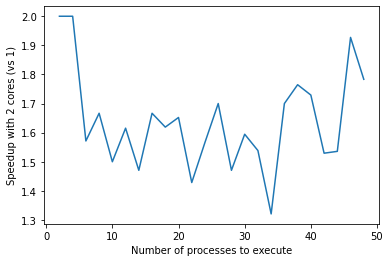

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel('Number of processes to execute')
ax.set_ylabel('Speedup with 2 cores (vs 1)')
ax.set_title('')
plt.plot(numprocesses, speedup)
plt.savefig('speedup-graph-checkprime')
plt.show()


In [48]:
import statistics
from scipy import stats

print(f'The mean speedup time is found to be {statistics.mean(speedup):.3g} times faster with 2 cores than with 1, and a standard deviation of {statistics.stdev(speedup):.3g}.')
print(f'The max speedup time is {max(speedup):.3g} times faster with 2 cores than with 1.')
print(f'The min speedup time is {min(speedup):.3g} times faster with 2 cores than with 1.')
print(f'The range of the values is {max(speedup)-min(speedup):.3g}')

The mean speedup time is found to be 1.64 times faster with 2 cores than with 1, and a standard deviation of 0.17.
The max speedup time is 2 times faster with 2 cores than with 1.
The min speedup time is 1.32 times faster with 2 cores than with 1.
The range of the values is 0.679


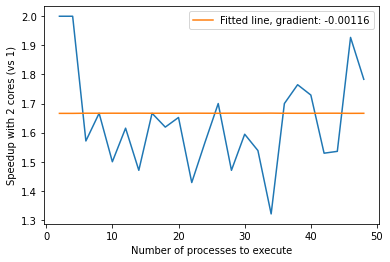

In [53]:
import numpy as np

fig, ax = plt.subplots()
ax.set_xlabel('Number of processes to execute')
ax.set_ylabel('Speedup with 2 cores (vs 1)')
ax.set_title('')
res = stats.linregress(numprocesses, speedup)
slope = res.slope
plt.plot(numprocesses, speedup)
plt.plot(np.asarray(numprocesses), res.intercept + res.slope*np.asarray(speedup), label=f'Fitted line, gradient: {slope:.3g}')
plt.legend()
plt.savefig('speedup-graph-checkprime-fitted')
plt.show()

In [88]:
speedup2 = []
numprocesses2 = []
dataRange2 = [1, 1]  # start with 2 processes to execute 
for _ in range(2, 6):
    numprocesses2.append(len(dataRange2))
    coresx1_2 = pool_process(sleep, dataRange2, 1)
    coresx2_2 = pool_process(sleep, dataRange2, 2)
    time1_2 = coresx1_2[1]
    time2_2 = coresx2_2[1]
    speedup2.append(time1_2/time2_2)
    dataRange2.append(dataRange2[-1]+1)   # insert 2 more 
    dataRange2.append(dataRange2[-1])   # processes

Sleeping 1 second(s)
[1, 1] 1
Sleeping 1 second(s)
Results ['Done Sleeping...1', 'Done Sleeping...1']
Overall Time: 2
Sleeping 1 second(s)Sleeping 1 second(s)

[1, 1] 2
Results ['Done Sleeping...1', 'Done Sleeping...1']
Overall Time: 1
Sleeping 1 second(s)
[1, 1, 2, 2] 1
Sleeping 1 second(s)
Sleeping 2 second(s)
Sleeping 2 second(s)
Results ['Done Sleeping...1', 'Done Sleeping...1', 'Done Sleeping...2', 'Done Sleeping...2']
Overall Time: 6
Sleeping 1 second(s)Sleeping 1 second(s)

[1, 1, 2, 2] 2
Sleeping 2 second(s)Sleeping 2 second(s)

Results ['Done Sleeping...1', 'Done Sleeping...1', 'Done Sleeping...2', 'Done Sleeping...2']
Overall Time: 3
Sleeping 1 second(s)
[1, 1, 2, 2, 3, 3] 1
Sleeping 1 second(s)
Sleeping 2 second(s)
Sleeping 2 second(s)
Sleeping 3 second(s)
Sleeping 3 second(s)
Results ['Done Sleeping...1', 'Done Sleeping...1', 'Done Sleeping...2', 'Done Sleeping...2', 'Done Sleeping...3', 'Done Sleeping...3']
Overall Time: 12
Sleeping 1 second(s)Sleeping 1 second(s)

[1, 1, 

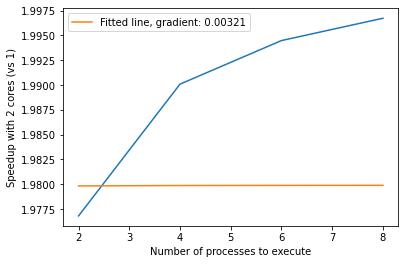

In [89]:
import numpy as np

fig, ax = plt.subplots()
ax.set_xlabel('Number of processes to execute')
ax.set_ylabel('Speedup with 2 cores (vs 1)')
ax.set_title('')
res = stats.linregress(numprocesses2, speedup2)
slope = res.slope
plt.plot(numprocesses2, speedup2)
plt.plot(np.asarray(numprocesses2), res.intercept + res.slope*np.asarray(speedup2), label=f'Fitted line, gradient: {slope:.3g}')
plt.legend()
plt.savefig('speedup-graph-sleep-fitted')
plt.show()